***
# Quantification<a id='quantification'></a>
***
[Back to Index](#Index)

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats import sem
from scipy import stats as st 
import scikit_posthocs
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import colorsys
import importlib
import svgutils
from svgutils.compose import *
import os.path
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import ipywidgets
from plotParams import *


pBGMenu = ipywidgets.Dropdown(options=['Light', 'Dark'],value='Light',disabled=False, layout=ipywidgets.Layout(width='20%', height='40px'))
pBGLabel = ipywidgets.widgets.Label('Select plotting style', layout=ipywidgets.Layout(width='20%', height='30px'))
pBG = ipywidgets.widgets.VBox([pBGLabel,pBGMenu])
pBG

### Read csv created during analysis and create bar plot for a single gene

In [43]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
goi = 'tbx2'


if goi == 'nr2e3':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/"
    fName = "CRnr2e3F0s_counts.csv"
    geneList = ['wt','nr2e3']
    geneLabels = ['control','nr2e3 F0 mutant']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'foxq2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRfoxq2F0/"
    fName = "CRfoxq2F0_counts.csv"
    geneList = ['wt','foxq2']
    geneLabels = ['control','foxq2 F0 mutant']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'skor1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRskor1aF0s/"
    fName = "CRskor1aF0_counts.csv"
    geneList = ['wt','skor1a']
    photoreceptors = ['U','S']
    geneLabels = ['control','skor1a F0 mutant']
elif goi == 'sall1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRsall1aF0s/"
    fName = "CRsall1aF0_counts.csv"
    geneList = ['wt','sall1a']
    geneLabels = ['control','sall1a F0 mutant']
    photoreceptors = ['R']
elif goi == 'xbp1':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRxbp1F0s/"
    fName = "CRxbp1F0_counts.csv"
    geneList = ['wt','xbp1']
    geneLabels = ['control','xbp1 F0 mutant']
    photoreceptors = ['R','U','S','M']
elif goi == 'lrrfip1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRlrrfip1aF0s/"
    fName = "CRlrrfip1aF0s_counts.csv"
    geneList = ['wt','lrrfip1a']
    geneLabels = ['control','lrrfip1a F0 mutant']
    # photoreceptors = ['R','U','S','M']
    photoreceptors = ['S','M']
elif goi == 'tbx2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
    fName = "CRtbx2F0s_combinedCounts.csv"
    geneList = ['wt','tbx2a','tbx2b']
    geneLabels = ['control','tbx2a F0 mutant','tbx2b F0 mutant']
    photoreceptors = ['R','U','S','M','L']
    # photoreceptors = ['R','U']
elif goi == 'tbx2aF3_nr2e3F0':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2aF3s_nr2e3F0/"
    fName = "tbx2aF3nr2e3F0_counts.csv"
    geneList = ['wt','nr2e3']
    geneLabels = ['control','nr2e3 F0 mutant']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
else:
    dPath = "zzzzzzz"
    fName = "zzzzz.csv"
    geneList = ['wt','zzzzz']
    photoreceptors = ['R','U','S','M','L']



df = pd.read_csv(dPath + fName)
df.tail(50)
# df[df['filename'].str.startswith('20210514')]

Plotting style is Light


,filename,R,U,S,M,L,Nu,Nsml,genotype,analysisFlag,genotypingFlag,excludeFlag,notes
185,20221026_5dpf_xOG_s1C_tbx2bF0_L08_002,83.0,130.0,NaN,NaN,NaN,NaN,NaN,tbx2b,111,1,0,bad DAPI
186,20221026_5dpf_xOG_s1C_tbx2bF0_L08_004,99.0,78.0,NaN,NaN,NaN,NaN,NaN,tbx2b,111,1,0,terrible DAPI
187,20221026_5dpf_xOG_s1C_tbx2bF0_L09_002,116.0,23.0,NaN,NaN,NaN,23.0,583.0,tbx2b,111,1,0,EXAMPLE of pronounced lor
188,20221026_5dpf_xOG_s1C_tbx2bF0_L09_004,107.0,38.0,NaN,NaN,NaN,43.0,607.0,tbx2b,111,1,0,EXAMPLE too
189,20221026_5dpf_xOG_s1C_tbx2bF0_L10_002,151.0,10.0,NaN,NaN,NaN,11.0,575.0,tbx2b,111,1,0,EXAMPLE
190,20221026_5dpf_xOG_s1C_tbx2bF0_L10_004,129.0,23.0,NaN,NaN,NaN,28.0,576.0,tbx2b,111,1,0,good
191,20221026_5dpf_xOG_s1C_tbx2bF0_L11_002,140.0,24.0,NaN,NaN,NaN,27.0,NaN,tbx2b,111,1,0,614 S/M/L nucs but noisy; skipping for nucs
192,20221026_5dpf_xOG_s1C_tbx2bF0_L11_004,137.0,18.0,NaN,NaN,NaN,18.0,678.0,tbx2b,111,1,0,very good; example maybe
193,20221026_5dpf_xOG_s1C_tbx2bF0_L12_002,39.0,131.0,NaN,NaN,NaN,146.0,563.0,tbx2b,111,1,0,very mild lor
194,20221026_5dpf_xOG_s1C_tbx2aF0_L01_002,26.0,91.0,NaN,NaN,NaN,110.0,745.0,tbx2a,111,1,0,good


# Standard plots (most genes)

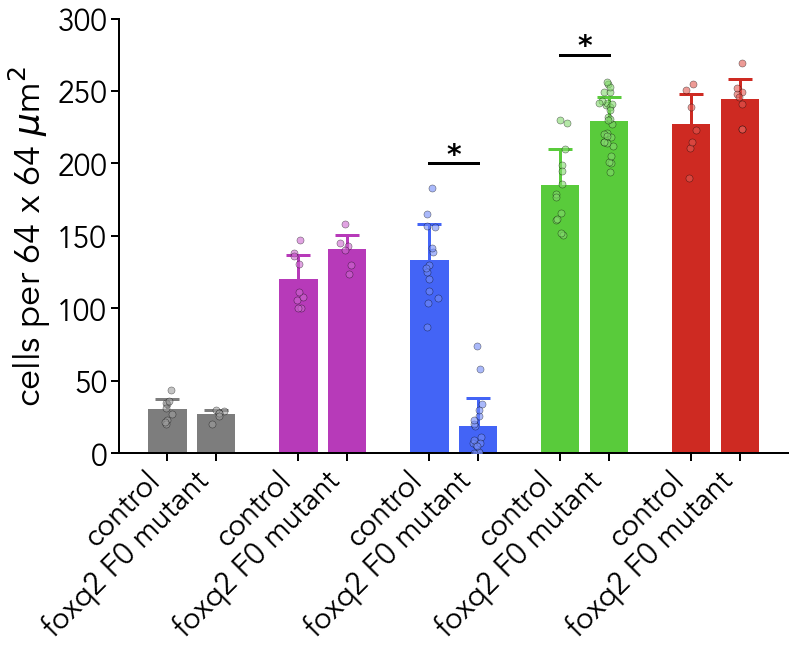

In [15]:
# geneList = ['wt','nr2e3']
nGenes = np.size(geneList)

# photoreceptors = ['R','U','S','M','L']
# photoreceptors = ['S','M']
# photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [2.4*np.size(photoreceptors),8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions
geneLabel = []

j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        countData = countData[~np.isnan(countData)]
        jitter = np.random.randn(len(countData))*0.02
        # jitter = estimateJitter(countData)*1
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=12, capthick=3, zorder=7)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels((geneLabels) * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
if goi == 'nr2e3':
    axH.set_ylim([0,300]);
    # significance bars
    h1=45
    p1 = [barPos[0],barPos[5]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=200
    p2 = [barPos[1],barPos[6]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.05,h2,'*',fontsize=28, fontweight='bold')
elif goi == 'foxq2':
    axH.set_ylim([0,300]);
    # significance bars
    h1=200
    p1 = [barPos[2],barPos[7]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=275
    p2 = [barPos[3],barPos[8]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.05,h2,'*',fontsize=28, fontweight='bold')
elif goi == 'skor1a':
    axH.set_ylim([0,250]);
elif goi == 'sall1a':
    axH.set_ylim([0,70]);
elif goi == 'lrrfip1a':
    axH.set_ylim([0,250]);
elif goi == 'xbp1':
    axH.set_ylim([0,250]);
    
savePath = '/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/' + goi + '/'
savePath = '/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/temp/'
# plt.savefig(savePath + goi + "_counts.svg", transparent=True, format="svg", bbox_inches = "tight")

## Stats

### Kruskal-Wallis
> does not assume normality  
> requires at least 5 samples  
> p-value is calculated as the survival function of H, assuming it follows a $\chi^{2}$ distribution
> for mutiple comparisons, test all groups first, then do posthoc test (Dunn | MannWhitney + Bonferroni correction | ConoverIman)

In [17]:
geneList = ['wt',goi]
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    h, p = kruskal(wtCount, crCount)
    print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t{0}:\t{1:.4f} absolute change'.format(pr,(np.mean(crCount))-np.mean(wtCount)))
    print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(crCount)))

wt vs. foxq2:
	R:	-11.21 % change
	R:	0.8879-fold change
	R:	-3.3889 absolute change
		H = 0.784, p = 0.3759053062, nEyes: wt = 9; cr = 6
	U:	16.99 % change
	U:	1.1699-fold change
	U:	20.3333 absolute change
		H = 3.562, p = 0.0591194583, nEyes: wt = 9; cr = 6
	S:	-86.16 % change
	S:	0.1384-fold change
	S:	-114.1667 absolute change
		H = 22.930, p = 0.0000016800, nEyes: wt = 14; cr = 18
	M:	24.02 % change
	M:	1.2402-fold change
	M:	44.2637 absolute change
		H = 17.549, p = 0.0000279927, nEyes: wt = 13; cr = 28
	L:	7.88 % change
	L:	1.0788-fold change
	L:	17.8393 absolute change
		H = 2.267, p = 0.1321178224, nEyes: wt = 7; cr = 8


In [18]:
20.3333+40.2637+17.8393

78.4363

### Mann-Whitney U
> originally used to avoid assumptions of normality  
> reviewer pointed out sensitivity to big differences in variance and recommended Kruskal-Wallis test

In [ ]:
geneList = ['wt','tbx2a']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    u, p = mannwhitneyu(wtCount, crCount)
    print('\t{0}:\t{1} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tU = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(u,p,len(wtCount),len(crCount)))

geneList = ['wt','tbx2b']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    u, p = mannwhitneyu(wtCount, crCount)
    print('\t{0}:\t{1} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tU = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(u,p,len(wtCount),len(crCount)))


In [ ]:
crCount

In [ ]:
df[(df['genotype']=='tbx2a') & (df['excludeFlag']==False)]

# Plots for tbx2 figures

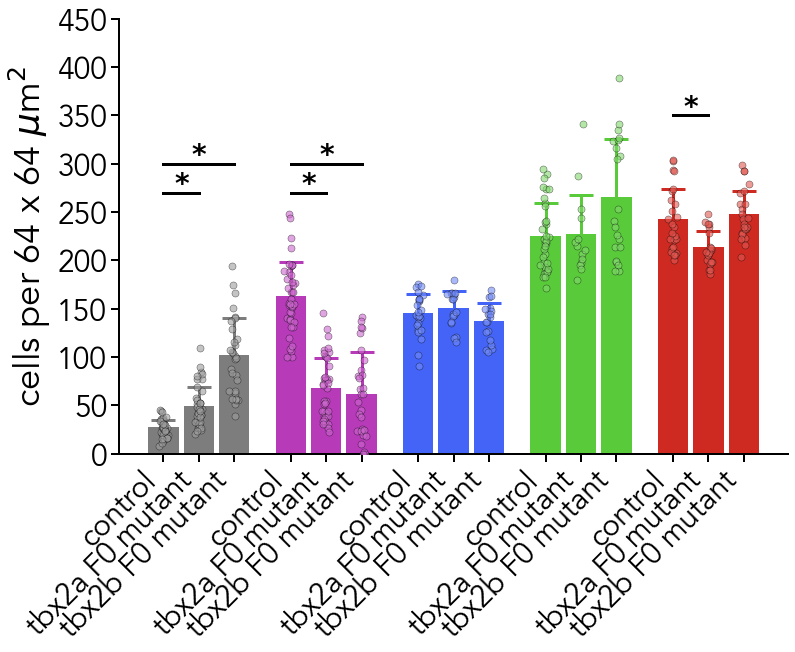

In [50]:
geneList = ['wt','tbx2a','tbx2b']
nGenes = np.size(geneList)
# photoreceptors = ['R','U']; fig = 'lor'
# photoreceptors = ['L']; fig = 'MvL'
# photoreceptors = ['S']; fig = 'MvS'
# photoreceptors = ['M']; fig = 'Monly'
photoreceptors = ['R','U','S','M','L']; fig = 'all'


plotname = ''
if fig == 'lor':
    fH, axH = plt.subplots(figsize= [8,8])
if fig == 'all':
    fH, axH = plt.subplots(figsize= [2.4*np.size(photoreceptors),8])
else:
    fH, axH = plt.subplots(figsize= [6,8])

    
barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.015
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=12, capthick=3, zorder=7)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels((geneLabels) * len(photoreceptors));

if fig == 'lor':
    axH.set_ylim([0,300]);
    # significance bars
    h1=280
    p1 = [barPos[0],barPos[4]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=260
    p2 = [barPos[0],barPos[2]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.025,h2,'*',fontsize=28, fontweight='bold')
    h3=240
    p3 = [barPos[2],barPos[4]]
    pH = plt.plot(p3,[h3,h3], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p3)-0.025,h3,'*',fontsize=28, fontweight='bold')
    
    h1=280
    p1 = [barPos[1],barPos[5]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=260
    p2 = [barPos[1],barPos[3]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.025,h2,'*',fontsize=28, fontweight='bold')
elif fig == 'MvL':
    axH.set_ylim([0,350]);
    # significance bars
    h1=330
    p1 = [barPos[0],barPos[1]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.025,h1,'*',fontsize=28, fontweight='bold')
elif fig == 'MvS':
    axH.set_ylim([0,220]);
elif fig == 'Monly':
    axH.set_ylim([0,450]);
    # significance bars
    h1=425
    p1 = [barPos[0],barPos[2]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.025,h1,'*',fontsize=28, fontweight='bold')
elif fig == 'all':
    axH.set_ylim([0,450]);
    # significance bars
    h1=300
    p1 = [barPos[0],barPos[5+5]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=270
    p2 = [barPos[0],barPos[5]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.05,h2,'*',fontsize=28, fontweight='bold')
    h1=300
    p1 = [barPos[1],barPos[6+5]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h2=270
    p2 = [barPos[1],barPos[6]]
    pH = plt.plot(p2,[h2,h2], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p2)-0.05,h2,'*',fontsize=28, fontweight='bold')
    # h1=430
    # p1 = [barPos[3],barPos[3+10]]
    # pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    # pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')
    h1=350
    p1 = [barPos[4],barPos[4+5]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')


savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
plt.savefig(savePath + 'tbx2_' + fig + '.svg', transparent=True, format="svg", bbox_inches = "tight")

### Stats for multiple comparisons

In [48]:
geneList = ['wt','tbx2a','tbx2b']
# print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    aCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    aCount = aCount[~np.isnan(aCount)]
    
    bCount = df[(df['genotype']==(geneList[2]))&(df['excludeFlag']==False)][pr]
    bCount = bCount[~np.isnan(bCount)]
    
    h, p = kruskal(wtCount, aCount, bCount)
    print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount),geneList[1]))
    print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(aCount))/np.mean(wtCount),geneList[1]))
    print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(aCount))-np.mean(wtCount),geneList[1]))
    print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount),geneList[2]))
    print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(bCount))/np.mean(wtCount),geneList[2]))
    print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(bCount))-np.mean(wtCount),geneList[2]))
    print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtCount),geneList[1],len(aCount),geneList[2],len(bCount)))
    
    r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount], p_adjust='Bonferroni')
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('\t\tConover-Iman posthoc + Bonferroni p adjustment:')
    print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(geneList[1],geneList[2],r.iloc[1,2]))
    
    r = scikit_posthocs.posthoc_dunn([wtCount, aCount, bCount], p_adjust='Bonferroni')
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('\t\tDunn posthoc + Bonferroni p adjustment:')
    print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}\n'.format(geneList[1],geneList[2],r.iloc[1,2]))


	R:	85.77 % change for tbx2a
	R:	1.8577-fold change for tbx2a
	R:	22.4500 absolute change for tbx2a

	R:	285.48 % change for tbx2b
	R:	3.8548-fold change for tbx2b
	R:	74.7250 absolute change for tbx2b

		H = 71.725, p = 0.00000000000000026608, nEyes: wt = 40; tbx2a = 40; tbx2b = 30
		Conover-Iman posthoc + Bonferroni p adjustment:
			wt vs. tbx2a: p = 0.00000000002955277246 | p = 2.955277245870321e-11
			wt vs. tbx2b: p = 0.00000000000000000000 | p = 4.158290880569486e-26
			tbx2a vs. tbx2b: p = 0.00000000022501353945 | p = 2.2501353945493557e-10
		Dunn posthoc + Bonferroni p adjustment:
			wt vs. tbx2a: p = 0.00001960082466800234 | p = 1.9600824668002342e-05
			wt vs. tbx2b: p = 0.00000000000000009362 | p = 9.362444909427923e-17
			tbx2a vs. tbx2b: p = 0.00005915991683914283 | p = 5.9159916839142835e-05

	U:	-58.91 % change for tbx2a
	U:	0.4109-fold change for tbx2a
	U:	-95.5750 absolute change for tbx2a

	U:	-62.32 % change for tbx2b
	U:	0.3768-fold change for tbx2b
	U:	-101.1121 ab

In [390]:
geneList = ['wt','tbx2a']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    h, p = kruskal(wtCount, crCount)
    print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(crCount)))

geneList = ['wt','tbx2b']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    h, p = kruskal(wtCount, crCount)
    print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(crCount)))

geneList = ['tbx2a','tbx2b']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    h, p = kruskal(wtCount, crCount)
    print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(crCount)))

wt vs. tbx2a:
	R:	85.77 % change
	R:	1.8577-fold change
		H = 31.177, p = 0.00000002354940455970, nEyes: wt = 40; cr = 40
	U:	-58.91 % change
	U:	0.4109-fold change
		H = 53.780, p = 0.00000000000022427559, nEyes: wt = 40; cr = 40
wt vs. tbx2b:
	R:	285.48 % change
	R:	3.8548-fold change
		H = 50.228, p = 0.00000000000136857676, nEyes: wt = 40; cr = 30
	U:	-62.32 % change
	U:	0.3768-fold change
		H = 42.627, p = 0.00000000006623837138, nEyes: wt = 40; cr = 29
tbx2a vs. tbx2b:
	R:	107.51 % change
	R:	2.0751-fold change
		H = 31.257, p = 0.00000002260664386299, nEyes: wt = 40; cr = 30
	U:	-8.30 % change
	U:	0.9170-fold change
		H = 0.664, p = 0.41526877374378490249, nEyes: wt = 40; cr = 29


# Correlations

## Load datasets for all genes

In [344]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
# genes = ['nr2e3','foxq2','tbx2','skor1a','sall1a']
genes = ['tbx2']

df = pd.DataFrame()
for goi in genes:
    if goi == 'nr2e3':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/"
        fName = "CRnr2e3F0s_counts.csv"
        geneList = ['wt','nr2e3']
        photoreceptors = ['R','U','S','M','L']
    elif goi == 'foxq2':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRfoxq2F0/"
        fName = "CRfoxq2F0_counts.csv"
        geneList = ['wt','foxq2']
        photoreceptors = ['R','U','S','M','L']
    elif goi == 'skor1a':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRskor1aF0s/"
        fName = "CRskor1aF0_counts.csv"
        geneList = ['wt','skor1a']
        photoreceptors = ['U','S']
    elif goi == 'sall1a':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRsall1aF0s/"
        fName = "CRsall1aF0_counts.csv"
        geneList = ['wt','sall1a']
        photoreceptors = ['R']
    elif goi == 'xbp1':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRxbp1F0s/"
        fName = "CRxbp1F0_counts.csv"
        geneList = ['wt','xbp1']
        photoreceptors = ['R','U','S','M']
    elif goi == 'lrrfip1a':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRlrrfip1aF0s/"
        fName = "CRlrrfip1aF0s_counts.csv"
        geneList = ['wt','lrrfip1a']
        photoreceptors = ['R','U','S','M']
        photoreceptors = ['S','M']
    elif goi == 'tbx2':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
        fName = "CRtbx2F0s_combinedCounts.csv"
        geneList = ['wt','tbx2a','tbx2b']
        photoreceptors = ['R','U','S','M','L']
        # photoreceptors = ['R','U']
    elif goi == 'tbx2aF3_nr2e3F0':
        dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2aF3s_nr2e3F0/"
        fName = "tbx2aF3nr2e3F0_counts.csv"
        geneList = ['wt','nr2e3']
        # photoreceptors = ['R','U','S','M','L']
        photoreceptors = ['R','U']
    else:
        dPath = "zzzzzzz"
        fName = "zzzzz.csv"
        geneList = ['wt','zzzzz']
        photoreceptors = ['R','U','S','M','L']
    temp = pd.read_csv(dPath + fName)
    df = df.append(temp)

# df[df['genotype']=='skor1a']

Plotting style is Light


## F&empty;[_tbx2_]: Rods vs. UV cones

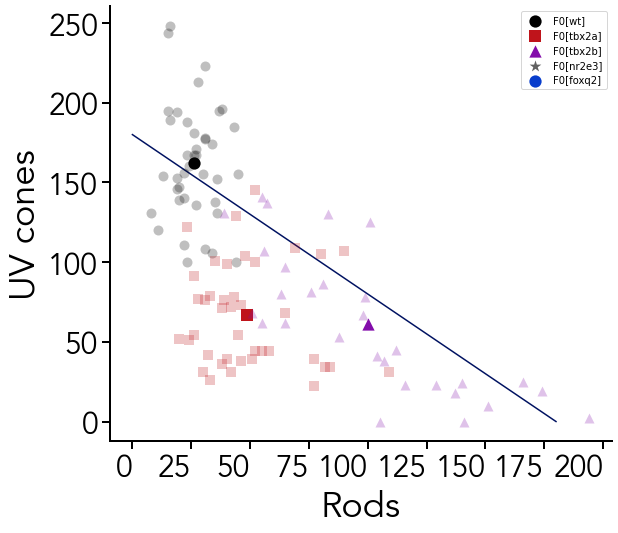

In [78]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]

geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2']
# geneList = ['nr2e3','foxq2']

nGenes = np.size(geneList)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for gene,geneColor,geneMarker in zip(geneList,['#000000','#BF141B','#830DAB','#616161','#083DCC'],['o','s','^','*','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    pH = plt.scatter(countA, countB,
             color=geneColor, zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=0, alpha = 0.25);
    pH = plt.scatter(np.mean(countA), np.mean(countB),
             color=geneColor, zorder=8, marker = geneMarker, s=150, edgecolor=baseColor, linewidth=0, alpha = 1, label = 'F0[' + gene + ']');

pH = plt.plot(np.linspace(180,0,num=100),np.linspace(0,180,num=100))
fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
# axH.set_xlim([-5,80]); # tbx2
# axH.set_ylim([-5,180]); # tbx2
axH.legend()

---
## Rods + UV cones: many genes

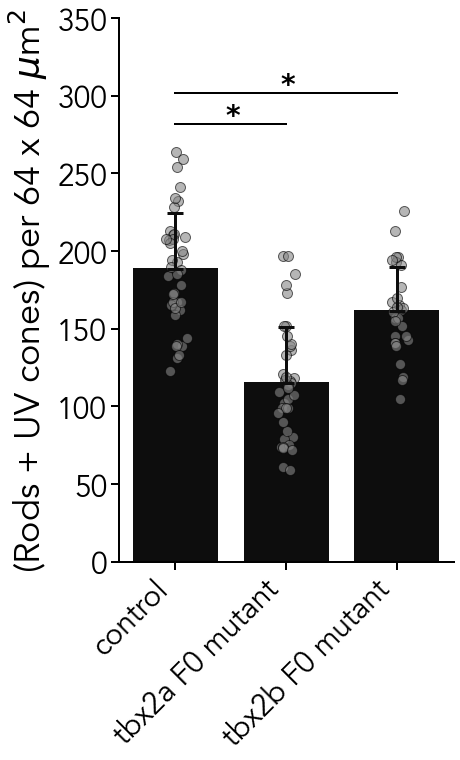

wt vs. tbx2a:
	R+U:	-38.81 % change
	R+U:	0.6119-fold change
	R+U:	-73.1250 average total loss
wt vs. tbx2b:
	R+U:	-14.34 % change
	R+U:	0.8566-fold change
	R+U:	-27.0112 average total loss
tbx2a vs. tbx2b:
	R+U:	39.99 % change
	R+U:	1.3999-fold change
	R+U:	46.1138 average total loss
R+U:	H = 50.156, p = 0.00000000001284874632, nEyes: wt = 40; tbx2a = 40; tbx2b = 29
		Conover-Iman posthoc + Bonferroni p adjustment:
			wt vs. tbx2a: p = 0.00000000000000238379 | p = 2.3837889194640335e-15
			wt vs. tbx2b: p = 0.00671805870196952662 | p = 0.006718058701969527
			tbx2a vs. tbx2b: p = 0.00000059183804289601 | p = 5.918380428960123e-07


In [445]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]

geneList = ['wt','tbx2a','tbx2b']
# geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2']

nGenes = np.size(geneList)
photoreceptors = ['U','R']

plotname = ''
fH, axH = plt.subplots(figsize= [6,10])

i=0;
# for gene,geneColor,geneMarker in zip(geneList,['#000000','#BF141B','#830DAB','#616161','#083DCC'],['o','s','^','*','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
for gene,geneColor,geneMarker in zip(geneList,['#0D0D0D','#0D0D0D','#0D0D0D'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
    elif gene == 'tbx2a':
        aCount = countData
    elif gene == 'tbx2b':
        bCount = countData
    elif gene == 'nr2e3':
        nCount = countData
    elif gene == 'foxq2':
        fCount = countData
    i = i+1
    jitter = np.random.randn(len(countA))*0.04
    pH = plt.bar(i, np.mean(countData), width=0.75, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countData,
             color=lighten_color(geneColor,.5), zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=1, alpha = 0.6);
    
    # pH = plt.bar(i, np.mean(countA), width=0.5, color='#A51CAB', linewidth = 2, edgecolor = '#A51CAB');    
    # pH = plt.errorbar(i, np.mean(countA), yerr = [[0],[np.std(countA)]], ecolor='#A51CAB', elinewidth=3, capsize=8, capthick=3, zorder=9)
    # pH = plt.scatter(np.ones(len(countA))*i+jitter, countA,
    #          color=lighten_color('#A51CAB',.75), zorder=8, marker = geneMarker, s=100, edgecolor='#A51CAB', linewidth=1, alpha = 0.6);
    

fontLabels = formatFigureMain(fH, axH, pH)
# axH.set_xticks([1,2,3,4,5]);
# axH.set_xticklabels(['control','F0[tbx2a]','F0[tbx2b]','F0[nr2e3]','F0[foxq2]']);
axH.set_xticks([1,2,3]);
axH.set_xticklabels(['control','tbx2a F0 mutant','tbx2b F0 mutant']);
axH.xaxis.set_tick_params(rotation=45)
axH.set_ylim([0,350]); # tbx2
axH.set_ylabel('(Rods + UV cones) per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)

# attempt for significance bars
h1=282
pH = plt.plot([1,2],[h1,h1], linewidth = 2, color = '#000000')
pH = plt.text(1.45,h1,'*',fontsize=28, fontweight='bold')
h2=302
pH = plt.plot([1,3],[h2,h2], linewidth = 2, color = '#000000')
pH = plt.text(1.95,h2,'*',fontsize=28, fontweight='bold')

savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + geneList[1] + "_RplusUcounts.svg", transparent=True, format="svg", bbox_inches = "tight")

plt.show()

pr = 'R+U'
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(aCount))-np.mean(wtCount)))

print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(bCount))-np.mean(wtCount)))

print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(bCount))-np.mean(aCount)))


h, p = kruskal(wtCount, aCount, bCount)
print('R+U:\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtCount),geneList[1],len(aCount),geneList[2],len(bCount)))
r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount], p_adjust='Bonferroni')
print('\t\tConover-Iman posthoc + Bonferroni p adjustment:')
print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(geneList[1],geneList[2],r.iloc[1,2]))


---
## S cones + M cones: many genes

Don't have reliable M cone counts for F0[tbx2a] or F0[tbx2b]  
- Need to do exclusing of double positive cells in m2g &times; s2C for Fo[tbx2b] &rarr 2022/10/21
- Need to do exclusing of double positive cells in m2g &times; t2T for Fo[tbx2a]

In [ ]:
cdf = df[(~np.isnan(df['S'].values)&~np.isnan(df['M'].values))]
cdf = cdf[cdf['excludeFlag']==0]

# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2']

nGenes = np.size(geneList)
photoreceptors = ['S','M']

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
for gene,geneColor,geneMarker in zip(geneList,['#00000080','#BF141B80','#830DAB80','#61616180','#083DCC80'],['o','s','^','*','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
    elif gene == 'tbx2a':
        aCount = countData
    elif gene == 'tbx2b':
        bCount = countData
    elif gene == 'nr2e3':
        nCount = countData
    elif gene == 'foxq2':
        fCount = countData
    i = i+1
    jitter = np.random.randn(len(countA))*0.025
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=1, alpha = 0.6);

    

fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3,4,5]);
axH.set_xticklabels(['control','F0[tbx2a]','F0[tbx2b]','F0[nr2e3]','F0[foxq2]']);
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,300]); # tbx2
axH.set_ylabel('(S + M cones) per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
plt.show()


pr = 'S+M'
h, p = kruskal(wtCount, aCount)
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(aCount)))

h, p = kruskal(wtCount, bCount)
print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(bCount)))

h, p = kruskal(aCount, bCount)
print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(aCount),len(bCount)))

---
## L cones + M cones: many genes

Don't have reliable M cone counts for F0[tbx2a] or F0[tbx2b]  
- Need to do exclusing of double positive cells in m2g &times; s2C for Fo[tbx2b] &rarr 2022/10/21
- Need to do exclusing of double positive cells in m2g &times; t2T for Fo[tbx2a]

In [ ]:
cdf = df[(~np.isnan(df['L'].values)&~np.isnan(df['M'].values))]
cdf = cdf[cdf['excludeFlag']==0]

# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2']

nGenes = np.size(geneList)
photoreceptors = ['L','M']

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
for gene,geneColor,geneMarker in zip(geneList,['#00000080','#BF141B80','#830DAB80','#61616180','#083DCC80'],['o','s','^','*','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
    elif gene == 'tbx2a':
        aCount = countData
    elif gene == 'tbx2b':
        bCount = countData
    elif gene == 'nr2e3':
        nCount = countData
    elif gene == 'foxq2':
        fCount = countData
    i = i+1
    jitter = np.random.randn(len(countA))*0.025
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=1, alpha = 0.6);

    

fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3,4,5]);
axH.set_xticklabels(['control','F0[tbx2a]','F0[tbx2b]','F0[nr2e3]','F0[foxq2]']);
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,300]); # tbx2
axH.set_ylabel('(L + M cones) per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
plt.show()


pr = 'L+M'
h, p = kruskal(wtCount, aCount)
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(aCount)))

h, p = kruskal(wtCount, bCount)
print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(bCount)))

h, p = kruskal(aCount, bCount)
print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(aCount),len(bCount)))

---
## Nuclear counts: UV holes + S/M/L nuclei

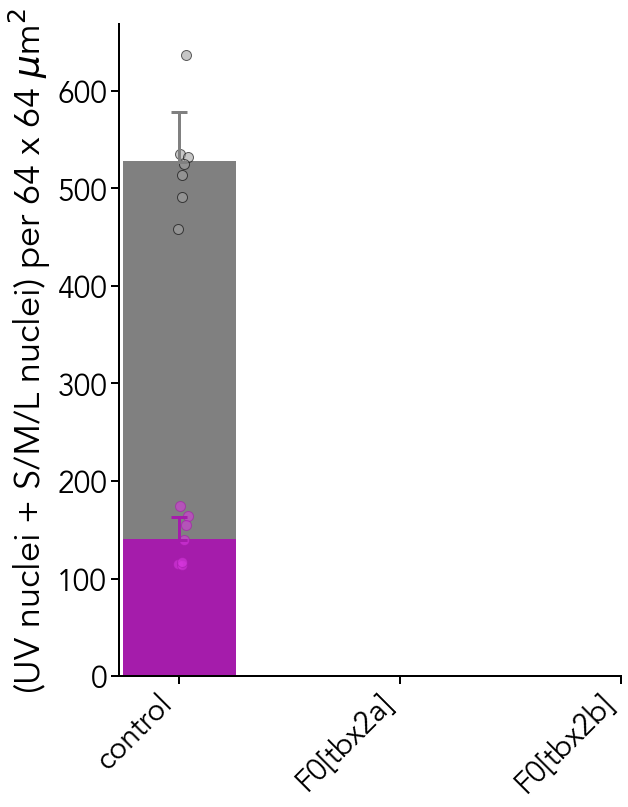

wt vs. tbx2a:
	R+U:	nan % change
	R+U:	nan-fold change
		H = nan, p = nan, nEyes: wt = 7; cr = 0
wt vs. tbx2b:
	R+U:	nan % change
	R+U:	nan-fold change
		H = nan, p = nan, nEyes: wt = 7; cr = 0
tbx2a vs. tbx2b:
	R+U:	nan % change
	R+U:	nan-fold change
		H = nan, p = nan, nEyes: wt = 0; cr = 0


In [45]:
cdf = df[(~np.isnan(df['Nu'].values)&~np.isnan(df['Nsml'].values))]
cdf = cdf[cdf['excludeFlag']==0]

# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2','skor1a','sall1a']

nGenes = np.size(geneList)
photoreceptors = ['Nu','Nsml']

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
# for gene,geneColor,geneMarker in zip(geneList,['#000000','#BF141B','#4364F6','#616161','#083DCC'],['o','s','^','*','o']):
for gene,geneColor,geneMarker in zip(geneList,['#000000','#000000','#000000','#000000','#000000','#000000','#000000'],['o','s','^','*','o','o','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
    elif gene == 'tbx2a':
        aCount = countData
    elif gene == 'tbx2b':
        bCount = countData
    elif gene == 'nr2e3':
        nCount = countData
    elif gene == 'foxq2':
        fCount = countData
    elif gene == 'skor1a':
        sCount = countData
    elif gene == 'sall1a':
        sallCount = countData
    i = i+1
    jitter = np.random.randn(len(countA))*0.025
    # UV-cone nuclei
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=1, alpha = 0.6);
    
    # SML-cone nuclei
    pH = plt.bar(i, np.mean(countA), width=0.5, color='#A51CAB', linewidth = 2, edgecolor = '#A51CAB');    
    pH = plt.errorbar(i, np.mean(countA), yerr = [[0],[np.std(countA)]], ecolor='#A51CAB', elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countA,
             color=lighten_color('#A51CAB',.75), zorder=8, marker = geneMarker, s=100, edgecolor='#A51CAB', linewidth=1, alpha = 0.6);
    

    

fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3,4,5,6,7]);
axH.set_xticklabels(['control','F0[tbx2a]','F0[tbx2b]','F0[nr2e3]','F0[foxq2]','F0[skor1a]','F0[sall1a]']);
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,300]); # tbx2
axH.set_ylabel('(UV nuclei + S/M/L nuclei) per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)

# savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + geneList[1] + "_Ncounts.svg", transparent=True, format="svg", bbox_inches = "tight")
plt.show()


pr = 'R+U'
h, p = kruskal(wtCount, aCount)
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(aCount)))

h, p = kruskal(wtCount, bCount)
print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(bCount)))

h, p = kruskal(aCount, bCount)
print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(aCount),len(bCount)))

## Nuclear counts: no pooling (trying to preserve sample pairing of wt vs F&empty;

### tbx2

Plotting style is Light


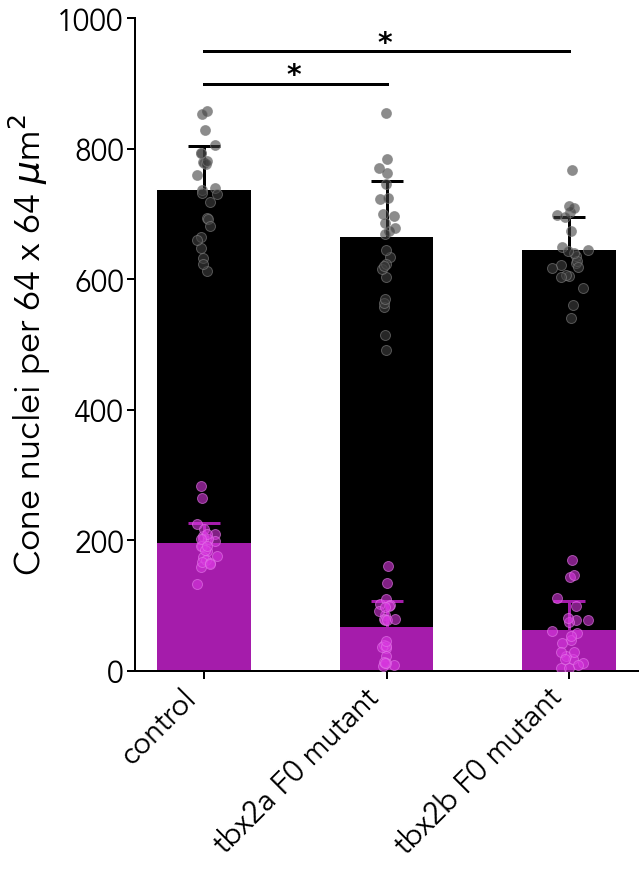

wt vs. tbx2a:
	Nucs:	-9.79 % change
	Nucs:	0.9021-fold change
	UV-Nucs:	-66.63 % change
	UV-Nucs:	-129.6433 average UV loss
	Nucs:	-71.9633 average total loss
wt vs. tbx2b:
	Nucs:	-12.51 % change
	Nucs:	0.8749-fold change
	UV-Nucs:	-69.05 % change
	UV-Nucs:	-134.3426 average UV loss
	Nucs:	-91.9235 average total loss
tbx2a vs. tbx2b:
	Nucs:	-3.01 % change
	Nucs:	0.9699-fold change
	UV-Nucs:	-7.24 % change
	UV-Nucs:	-4.6993 average UV loss
	Nucs:	-19.9601 average total loss
R+U:	H = 17.132, p = 0.00019051210488365614, nEyes: wt = 25; tbx2a = 24; tbx2b = 23
		Conover-Iman posthoc + Bonferroni p adjustment:
			wt vs. tbx2a: p = 0.00393180571960987345 | p = 0.0039318057196098734
			wt vs. tbx2b: p = 0.00008432183155960695 | p = 8.432183155960695e-05
			tbx2a vs. tbx2b: p = 0.74830147726307516542 | p = 0.7483014772630752
U:	H = 46.811, p = 0.00000000006840262347, nEyes: wt = 25; tbx2a = 24; tbx2b = 23
		Conover-Iman posthoc + Bonferroni p adjustment:
			wt vs. tbx2a: p = 0.00000000000005298

In [51]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
goi = 'tbx2' # one gene at a time to not do pooling of wt

dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
fName = "CRtbx2F0s_combinedCounts.csv"
geneList = ['wt','tbx2a','tbx2b']
photoreceptors = ['R','U','S','M','L']
# photoreceptors = ['R','U']

df = pd.read_csv(dPath + fName)


cdf = df[(~np.isnan(df['Nu'].values)&~np.isnan(df['Nsml'].values))]
cdf = cdf[cdf['excludeFlag']==0]

photoreceptors = ['Nu','Nsml']

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
# for gene,geneColor,geneMarker in zip(['wt','tbx2a','tbx2b'],['#808080','#D57B7A','#869DF6'],['o','o','o']):
for gene,geneColor,geneMarker in zip(['wt','tbx2a','tbx2b'],['#000000','#000000','#000000'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
        wtUCount = countA
    elif gene == 'tbx2a':
        aCount = countData
        aUCount = countA
    elif gene == 'tbx2b':
        bCount = countData
        bUCount = countA
    i = i+1
    # jitter = np.random.randn(len(countA))*0.025
    jitter = estimateJitter(countData) * 8
    # SML-cone nuclei
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countData))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color(geneColor,.5), linewidth=1, alpha = 0.6);
    
    # UV-cone nuclei
    pH = plt.bar(i, np.mean(countA), width=0.5, color='#A51CAB', linewidth = 2, edgecolor = '#A51CAB');    
    pH = plt.errorbar(i, np.mean(countA), yerr = [[0],[np.std(countA)]], ecolor='#A51CAB', elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countA,
             color=lighten_color('#A51CAB',.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color('#A51CAB',.5), linewidth=1, alpha = 0.6);
    

# attempt for significance bars
h1=900
pH = plt.plot([1,2],[h1,h1], linewidth = 3, color = '#000000')
pH = plt.text(1.45,h1,'*',fontsize=28, fontweight='bold')
h2=950
pH = plt.plot([1,3],[h2,h2], linewidth = 3, color = '#000000')
pH = plt.text(1.95,h2,'*',fontsize=28, fontweight='bold')


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3]);
axH.set_xticklabels(['control','tbx2a F0 mutant','tbx2b F0 mutant']);
axH.xaxis.set_tick_params(rotation=45)
axH.set_ylim([0,1000]); # tbx2
axH.set_ylabel('Cone nuclei per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)

savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + geneList[1] + "_Ncounts.svg", transparent=True, format="svg", bbox_inches = "tight")
plt.show()


pr = 'Nucs'
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\tUV-{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aUCount)-np.mean(wtUCount))/np.mean(wtUCount)))
print('\tUV-{0}:\t{1:.4f} average UV loss'.format(pr,(np.mean(aUCount))-np.mean(wtUCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(aCount))-np.mean(wtCount)))

print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\tUV-{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bUCount)-np.mean(wtUCount))/np.mean(wtUCount)))
print('\tUV-{0}:\t{1:.4f} average UV loss'.format(pr,(np.mean(bUCount))-np.mean(wtUCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(bCount))-np.mean(wtCount)))

print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\tUV-{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bUCount)-np.mean(aUCount))/np.mean(aUCount)))
print('\tUV-{0}:\t{1:.4f} average UV loss'.format(pr,(np.mean(bUCount))-np.mean(aUCount)))
print('\t{0}:\t{1:.4f} average total loss'.format(pr,(np.mean(bCount))-np.mean(aCount)))


h, p = kruskal(wtCount, aCount, bCount)
print('R+U:\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtCount),geneList[1],len(aCount),geneList[2],len(bCount)))
r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount], p_adjust='Bonferroni')
print('\t\tConover-Iman posthoc + Bonferroni p adjustment:')
print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(geneList[1],geneList[2],r.iloc[1,2]))


h, p = kruskal(wtUCount, aUCount, bUCount)
print('U:\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtUCount),geneList[1],len(aUCount),geneList[2],len(bUCount)))
r = scikit_posthocs.posthoc_conover([wtUCount, aUCount, bUCount], p_adjust='Bonferroni')
print('\t\tConover-Iman posthoc + Bonferroni p adjustment:')
print('\t\t\twt vs. {0}: p = {1:.20f}'.format(geneList[1],r.iloc[0,1]))
print('\t\t\twt vs. {0}: p = {1:.20f}'.format(geneList[2],r.iloc[0,2]))
print('\t\t\t{0} vs. {1}: p = {2:.20f}'.format(geneList[1],geneList[2],r.iloc[1,2]))


Plotting style is Light


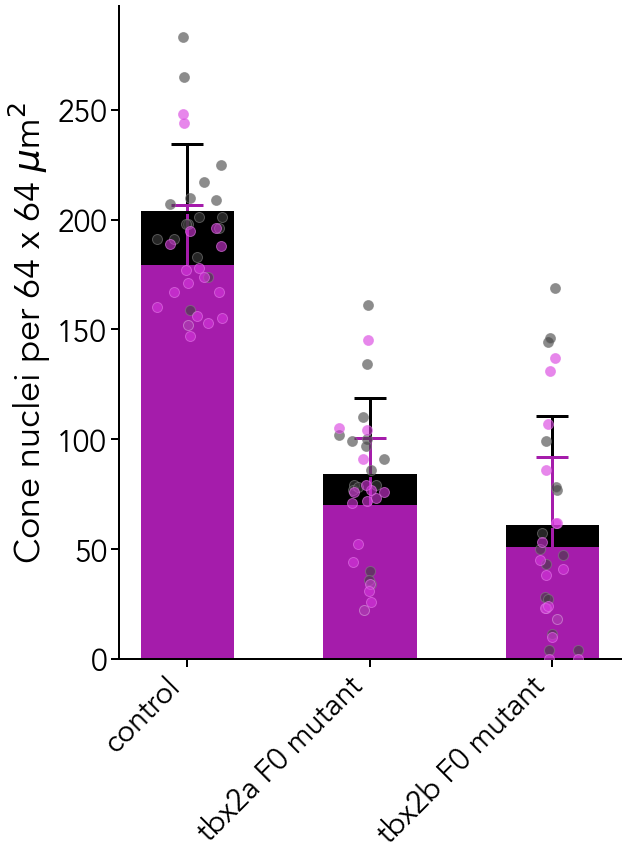

wt:
	Nucs:	-12.10 % diff Tg vs. DAPI
tbx2a:
	Nucs:	-17.33 % diff Tg vs. DAPI
tbx2b:
	Nucs:	-16.10 % diff Tg vs. DAPI


In [58]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
goi = 'tbx2' # one gene at a time to not do pooling of wt

dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
fName = "CRtbx2F0s_combinedCounts.csv"
geneList = ['wt','tbx2a','tbx2b']
photoreceptors = ['R','U','S','M','L']
# photoreceptors = ['R','U']

df = pd.read_csv(dPath + fName)


photoreceptors = ['U','Nu']

cdf = df[(~np.isnan(df[photoreceptors[0]].values)&~np.isnan(df[photoreceptors[1]].values))]
cdf = cdf[cdf['excludeFlag']==0]



plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
# for gene,geneColor,geneMarker in zip(['wt','tbx2a','tbx2b'],['#808080','#D57B7A','#869DF6'],['o','o','o']):
for gene,geneColor,geneMarker in zip(['wt','tbx2a','tbx2b'],['#000000','#000000','#000000'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = countB
    if gene == 'wt':
        wtCount = countData
        wtUCount = countA
    elif gene == 'tbx2a':
        aCount = countData
        aUCount = countA
    elif gene == 'tbx2b':
        bCount = countData
        bUCount = countA
    i = i+1
    # jitter = np.random.randn(len(countA))*0.025
    jitter = estimateJitter(countData) * 8
    # UV-cone nuclei
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countData))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color(geneColor,.5), linewidth=1, alpha = 0.6);
    
    # UV-cone nuclei
    pH = plt.bar(i, np.mean(countA), width=0.5, color='#A51CAB', linewidth = 2, edgecolor = '#A51CAB');    
    pH = plt.errorbar(i, np.mean(countA), yerr = [[0],[np.std(countA)]], ecolor='#A51CAB', elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countA,
             color=lighten_color('#A51CAB',.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color('#A51CAB',.5), linewidth=1, alpha = 0.6);
    

# # attempt for significance bars
# h1=900
# pH = plt.plot([1,2],[h1,h1], linewidth = 3, color = '#000000')
# pH = plt.text(1.45,h1,'*',fontsize=28, fontweight='bold')
# h2=950
# pH = plt.plot([1,3],[h2,h2], linewidth = 3, color = '#000000')
# pH = plt.text(1.95,h2,'*',fontsize=28, fontweight='bold')


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3]);
axH.set_xticklabels(['control','tbx2a F0 mutant','tbx2b F0 mutant']);
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,1000]); # tbx2
axH.set_ylabel('Cone nuclei per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)

savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + geneList[1] + "_Ncounts.svg", transparent=True, format="svg", bbox_inches = "tight")
plt.show()


print('{0}:'.format('wt'))
print('\t{0}:\t{1:.2f} % diff Tg vs. DAPI'.format(pr,100*(np.mean(wtUCount)-np.mean(wtCount))/np.mean(wtCount)))

print('{0}:'.format('tbx2a'))
print('\t{0}:\t{1:.2f} % diff Tg vs. DAPI'.format(pr,100*(np.mean(aUCount)-np.mean(aCount))/np.mean(aCount)))

print('{0}:'.format('tbx2b'))
print('\t{0}:\t{1:.2f} % diff Tg vs. DAPI'.format(pr,100*(np.mean(bUCount)-np.mean(bCount))/np.mean(bCount)))


### other genes

Plotting style is Light


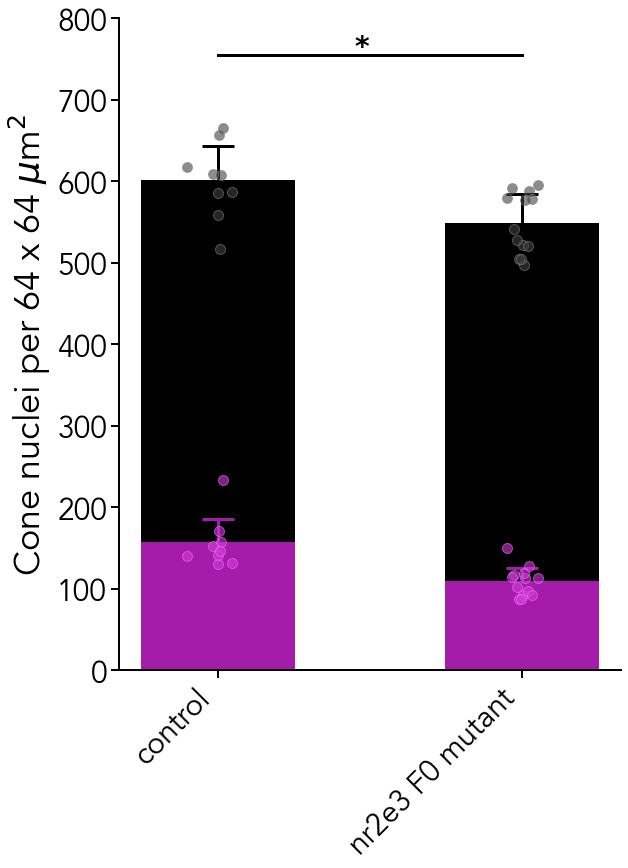

wt vs. nr2e3:
	Nu:	-30.42 % change
	Nu:	0.6958-fold change
	Nu:	-47.4957 average loss
		H = 12.778, p = 0.0003507034, nEyes: wt = 9; cr = 13
wt vs. nr2e3:
	Nu+Nsml:	-8.67 % change
	Nu+Nsml:	0.9133-fold change
	Nu+Nsml:	-52.0342 average loss
		H = 5.944, p = 0.0147652000, nEyes: wt = 9; cr = 13


In [381]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
goi = 'nr2e3' # one gene at a time to not do pooling of wt

df = pd.DataFrame()
if goi == 'nr2e3':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/"
    fName = "CRnr2e3F0s_counts.csv"
    geneList = ['wt','nr2e3']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'foxq2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRfoxq2F0/"
    fName = "CRfoxq2F0_counts.csv"
    geneList = ['wt','foxq2']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'skor1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRskor1aF0s/"
    fName = "CRskor1aF0_counts.csv"
    geneList = ['wt','skor1a']
    photoreceptors = ['U','S']
elif goi == 'sall1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRsall1aF0s/"
    fName = "CRsall1aF0_counts.csv"
    geneList = ['wt','sall1a']
    photoreceptors = ['R']
elif goi == 'xbp1':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRxbp1F0s/"
    fName = "CRxbp1F0_counts.csv"
    geneList = ['wt','xbp1']
    photoreceptors = ['R','U','S','M']
elif goi == 'lrrfip1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRlrrfip1aF0s/"
    fName = "CRlrrfip1aF0s_counts.csv"
    geneList = ['wt','lrrfip1a']
    photoreceptors = ['R','U','S','M']
    photoreceptors = ['S','M']
elif goi == 'tbx2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
    fName = "CRtbx2F0s_combinedCounts.csv"
    geneList = ['wt','tbx2a','tbx2b']
    photoreceptors = ['R','U','S','M','L']
    # photoreceptors = ['R','U']
elif goi == 'tbx2aF3_nr2e3F0':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2aF3s_nr2e3F0/"
    fName = "tbx2aF3nr2e3F0_counts.csv"
    geneList = ['wt','nr2e3']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
else:
    dPath = "zzzzzzz"
    fName = "zzzzz.csv"
    geneList = ['wt','zzzzz']
    photoreceptors = ['R','U','S','M','L']
df = pd.read_csv(dPath + fName)
# df = df.append(temp)

# df[df['genotype']==goi]

photoreceptors = ['Nu','Nsml']
cdf = df[(~np.isnan(df['Nu'].values)&~np.isnan(df['Nsml'].values))]
cdf = cdf[cdf['excludeFlag']==0]

barPos=[];

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
# for gene,geneColor,geneMarker in zip(geneList,['#000000','#BF141B','#4364F6','#616161','#083DCC'],['o','s','^','*','o']):
for gene,geneColor,geneMarker in zip(['wt',goi],['#000000','#000000'],['o','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtNCount = countData
        wtUCount = countA;
    else:
        F0NCount = countData
        F0UCount = countA;

    i = i+1
    barPos=np.append(barPos,i)
    # jitter = np.random.randn(len(countA))*0.025
    jitter = estimateJitter(countData) * 5
    # SML-cone nuclei
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countData))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color(geneColor,.5), linewidth=1, alpha = 0.6);
    
    # UV-cone nuclei
    pH = plt.bar(i, np.mean(countA), width=0.5, color='#A51CAB', linewidth = 2, edgecolor = '#A51CAB');    
    pH = plt.errorbar(i, np.mean(countA), yerr = [[0],[np.std(countA)]], ecolor='#A51CAB', elinewidth=3, capsize=16, capthick=3, zorder=7)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countA,
             color=lighten_color('#A51CAB',.75), zorder=8, marker = geneMarker, s=100, edgecolor=lighten_color('#A51CAB',.5), linewidth=1, alpha = 0.6);
    

    

fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2]);
axH.set_xticklabels(['control',goi + ' F0 mutant']);
axH.xaxis.set_tick_params(rotation=45)
axH.set_ylim([0,800]); # tbx2
axH.set_ylabel('Cone nuclei per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)

if goi == 'nr2e3':
    # significance bars
    h1=755
    p1 = [barPos[0],barPos[1]]
    pH = plt.plot(p1,[h1,h1], linewidth = 3, color = '#000000')
    pH = plt.text(np.mean(p1)-0.05,h1,'*',fontsize=28, fontweight='bold')

savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/"
plt.savefig(savePath + goi + "_Ncounts.svg", transparent=True, format="svg", bbox_inches = "tight")
plt.show()


pr = photoreceptors[0]
h, p = kruskal(wtUCount, F0UCount)
print('{0} vs. {1}:'.format('wt',goi))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(F0UCount)-np.mean(wtUCount))/np.mean(wtUCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(F0UCount))/np.mean(wtUCount)))
print('\t{0}:\t{1:.4f} average loss'.format(pr,(np.mean(F0UCount))-np.mean(wtUCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtUCount),len(F0UCount)))

pr = photoreceptors[0] + '+' + photoreceptors[1]
h, p = kruskal(wtNCount, F0NCount)
print('{0} vs. {1}:'.format('wt',goi))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(F0NCount)-np.mean(wtNCount))/np.mean(wtNCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(F0NCount))/np.mean(wtNCount)))
print('\t{0}:\t{1:.4f} average loss'.format(pr,(np.mean(F0NCount))-np.mean(wtNCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtNCount),len(F0NCount)))




In [188]:
cdf

,filename,R,U,S,M,L,Nu,Nsml,genotype,analysisFlag,genotypingFlag,excludeFlag,notes
31,20210514_5dpf_mw2G_s2C_CRfoxq2_L10b,NaN,NaN,NaN,212.0,NaN,212.0,377.0,foxq2,111,1,0,mCherry negative but feels like there are no S...
38,20210514_5dpf_mw2G_s2C_CRfoxq2_L16b,NaN,NaN,30.0,205.0,NaN,137.0,429.0,foxq2,111,1,0,DAPI dotted
40,20210514_5dpf_mw2G_s2C_CRfoxq2_L17b,NaN,NaN,1.0,NaN,NaN,161.0,453.0,foxq2,111,1,0,no GFP also not a decrease in nuclei counts
42,20210514_5dpf_mw2G_s2C_CRfoxq2_L19b,NaN,NaN,0.0,255.0,NaN,161.0,429.0,foxq2,111,1,0,only m cone labeling and not a loss of nucleai...
44,20210514_5dpf_mw2G_s2C_CRfoxq2_L21b,NaN,NaN,5.0,241.0,NaN,196.0,462.0,foxq2,111,1,0,could be EXAMPLE for DAPI dotting but unusuall...
45,20210514_5dpf_mw2G_s2C_CRfoxq2_L22b,NaN,NaN,23.0,194.0,NaN,147.0,415.0,foxq2,111,1,0,EXAMPLE for DAPI dotting
53,20210514_5dpf_mw2G_s2C_uninj_L16b,NaN,NaN,104.0,161.0,NaN,115.0,343.0,wt,111,1,0,might be slightly on the dorsal side-but i thi...
55,20210514_5dpf_mw2G_s2C_uninj_L18b,NaN,NaN,128.0,166.0,NaN,174.0,361.0,wt,111,1,0,NaN
56,20210514_5dpf_mw2G_s2C_uninj_L19b,NaN,NaN,112.0,162.0,NaN,164.0,368.0,wt,111,1,0,ONH in FOV but should be ok
67,20210514_5dpf_xOG_s1C_uninj_L03b,34.0,106.0,NaN,NaN,NaN,155.0,482.0,wt,111,1,0,NaN


In [ ]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['Nu'].values))]
cdf = cdf[cdf['excludeFlag']==0]

# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b','nr2e3','foxq2']

nGenes = np.size(geneList)
photoreceptors = ['R','Nu']

plotname = ''
fH, axH = plt.subplots(figsize= [9,12])

i=0;
for gene,geneColor,geneMarker in zip(geneList,['#000000','#BF141B','#830DAB','#616161','#083DCC'],['o','s','^','*','o']):
# for gene,geneColor,geneMarker in zip(geneList,['#808080','#D57B7A','#869DF6'],['o','o','o']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    countData = np.add(countA,countB)
    if gene == 'wt':
        wtCount = countData
    elif gene == 'tbx2a':
        aCount = countData
    elif gene == 'tbx2b':
        bCount = countData
    elif gene == 'nr2e3':
        nCount = countData
    elif gene == 'foxq2':
        fCount = countData
    i = i+1
    jitter = np.random.randn(len(countA))*0.025
    pH = plt.bar(i, np.mean(countData), width=0.5, color=geneColor, linewidth = 2, edgecolor = geneColor);
    pH = plt.errorbar(i, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=geneColor, elinewidth=3, capsize=8, capthick=3, zorder=9)
    pH = plt.scatter(np.ones(len(countA))*i+jitter, countData,
             color=lighten_color(geneColor,.75), zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=1, alpha = 0.6);

    

fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xticks([1,2,3,4,5]);
axH.set_xticklabels(['control','F0[tbx2a]','F0[tbx2b]','F0[nr2e3]','F0[foxq2]']);
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,300]); # tbx2
axH.set_ylabel('(UV nuclei + Rods) per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
plt.show()


pr = 'R+U'
h, p = kruskal(wtCount, aCount)
print('{0} vs. {1}:'.format('wt','tbx2a'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(aCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(aCount)))

h, p = kruskal(wtCount, bCount)
print('{0} vs. {1}:'.format('wt','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(wtCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(wtCount),len(bCount)))

h, p = kruskal(aCount, bCount)
print('{0} vs. {1}:'.format('tbx2a','tbx2b'))
print('\t{0}:\t{1:.2f} % change'.format(pr,100*(np.mean(bCount)-np.mean(aCount))/np.mean(aCount)))
print('\t{0}:\t{1:.4f}-fold change'.format(pr,(np.mean(bCount))/np.mean(aCount)))
print('\t\tH = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(h,p,len(aCount),len(bCount)))

#### F3[_tbx2a_] & F&empty;[_nr2e3_]

In [ ]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]
cdf[cdf['tbx2a']=='++']

geneListA = ['++','+-','--']
# geneListA = ['++','+-']
geneListB = ['wt','nr2e3']
# geneListB = ['wt']

nGenes = np.size(geneListA) * np.size(geneListB)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for geneA,colorA in zip(geneListA,['#000000','#616161','#ab266b']):
    for geneB,markerB in zip(geneListB,['o','*']):
        countA = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[0]]
        countB = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[1]]
        pH = plt.scatter(countA, countB,
                 color=colorA, zorder=8, marker = markerB, s=100, edgecolor=baseColor, linewidth=0.5, alpha = 1, label = 'tbx2a'+geneA+' '+geneB);


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
axH.set_xlim([-5,80]); # tbx2
axH.set_ylim([-5,180]); # tbx2
axH.legend()

# axH.set_xticks(np.sort(barPos));

# axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
# axH.set_ylim([0,500]); # tbx2


In [ ]:
cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)]